### Problem Statement

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
%matplotlib inline

In [8]:
db = pd.read_csv("diabetes.csv")

In [9]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
db.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [16]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X = db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = db["Outcome"]

In [18]:
X_train, X_t`est, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()

In [77]:
log.fit(X_train,y_train)

LogisticRegression()

In [78]:
pred = log.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.62      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [81]:
print(confusion_matrix(y_test,pred))

[[136  32]
 [ 34  52]]


#### Using Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dec_tree = DecisionTreeClassifier()

In [34]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
pred = dec_tree.predict(X_test)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.54      0.59      0.57        86

    accuracy                           0.69       254
   macro avg       0.66      0.67      0.66       254
weighted avg       0.70      0.69      0.70       254



In [37]:
print(confusion_matrix(y_test,pred))

[[125  43]
 [ 35  51]]


#### Using Random Tree

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators = 100)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [42]:
pred = rfc.predict(X_test)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.61      0.59      0.60        86

    accuracy                           0.74       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.74      0.74       254



In [44]:
print(confusion_matrix(y_test,pred))

[[136  32]
 [ 35  51]]


#### Using KNN

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(db.drop("Outcome",axis=1))

StandardScaler()

In [48]:
scaler_features = scaler.transform(db.drop("Outcome",axis=1))

In [51]:
df_feat = pd.DataFrame(scaler_features,columns = db.columns[:-1])

In [52]:
#  To visualize scaling
df_feat.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
289,0.342981,-0.403562,0.149641,1.409094,-0.041673,0.521311,-0.630831,-0.020496
271,-0.547919,-0.403562,-0.367337,0.719086,-0.206648,-0.862109,-1.038547,-1.041549


In [62]:
X=scaler_features
y=db["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
pred = knn.predict(X_test)

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       168
           1       0.56      0.50      0.53        86

    accuracy                           0.70       254
   macro avg       0.66      0.65      0.65       254
weighted avg       0.69      0.70      0.69       254



In [68]:
print(confusion_matrix(y_test,pred))

[[134  34]
 [ 43  43]]


In [69]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

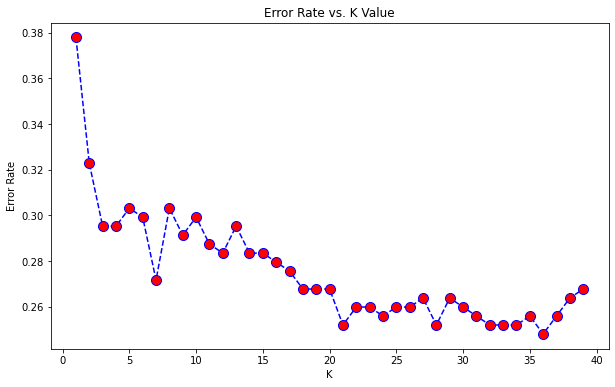

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
knn = KNeighborsClassifier(n_neighbors=36)

In [72]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       168
           1       0.71      0.45      0.55        86

    accuracy                           0.75       254
   macro avg       0.74      0.68      0.69       254
weighted avg       0.75      0.75      0.74       254



In [74]:
print(confusion_matrix(y_test,pred))

[[152  16]
 [ 47  39]]


#### Thus, Logistic Reg and KNN performed comparitively well 